In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn import metrics

In [2]:
# === Process the Original Data (Al_Spectre.xlsx) ===
# This section splits Al_Spectre.xlsx into two files:
#  - cleaned_data.xlsx: contains the first two columns from every group of three columns.
#  - test.xlsx: contains the third column from every group.
df = pd.read_excel('Data/Al_Spectre.xlsx', header=None)
cleaned_data = pd.DataFrame()
test_data_from_al = pd.DataFrame()


In [3]:
for i in range(0, df.shape[1], 3):
    cols = df.columns[i:i+3]
    if len(cols) < 3:  # Skip incomplete groups
        break
    # Concatenate the first two columns to cleaned_data
    cleaned_data = pd.concat([cleaned_data, df[cols[:2]]], axis=1)
    # Concatenate the third column to test_data_from_al
    test_data_from_al = pd.concat([test_data_from_al, df[cols[2]]], axis=1)

# Save the processed files
cleaned_data.to_excel('cleaned_data.xlsx', index=False, header=False)
test_data_from_al.to_excel('test.xlsx', index=False, header=False)


In [4]:
# === Load and Prepare Training Data ===
# Assume train.xlsx is structured such that each column is a sample.
# We transpose so that each sample becomes a row.
train_df = pd.read_excel('train.xlsx', header=None)
train_df = train_df.T

In [5]:
# Assume the last column is the target variable
y_train = train_df.iloc[:, -1]
x_train = train_df.iloc[:, :-1]

In [6]:
# === Load and Prepare Test Data ===
# Here we use the test.xlsx generated above.
test_df = pd.read_excel('test.xlsx', header=None)
test_df = test_df.T

In [7]:
# Assume the last column is the target variable for test data
y_test = test_df.iloc[:, -1]
x_test = test_df.iloc[:, :-1]

# Ensure x_test has the same number of features as x_train
if x_test.shape[1] != x_train.shape[1]:
    if x_test.shape[1] < x_train.shape[1]:
        padding = np.zeros((x_test.shape[0], x_train.shape[1] - x_test.shape[1]))
        x_test = np.hstack((x_test, padding))
    else:
        x_test = x_test.iloc[:, :x_train.shape[1]]

# Debug prints
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (18, 2017)
y_train shape: (18,)
x_test shape: (9, 2017)
y_test shape: (9,)


In [8]:
# === Train the Model ===
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [9]:
# Make predictions for both training and test sets
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [10]:
# Calculate and print R^2 scores
r2_train = metrics.r2_score(y_train, y_pred_train)
r2_test = metrics.r2_score(y_test, y_pred_test)
print(f"R^2 Score (Train): {r2_train:.4f}")
print(f"R^2 Score (Test): {r2_test:.4f}")

R^2 Score (Train): 1.0000
R^2 Score (Test): -813.9686


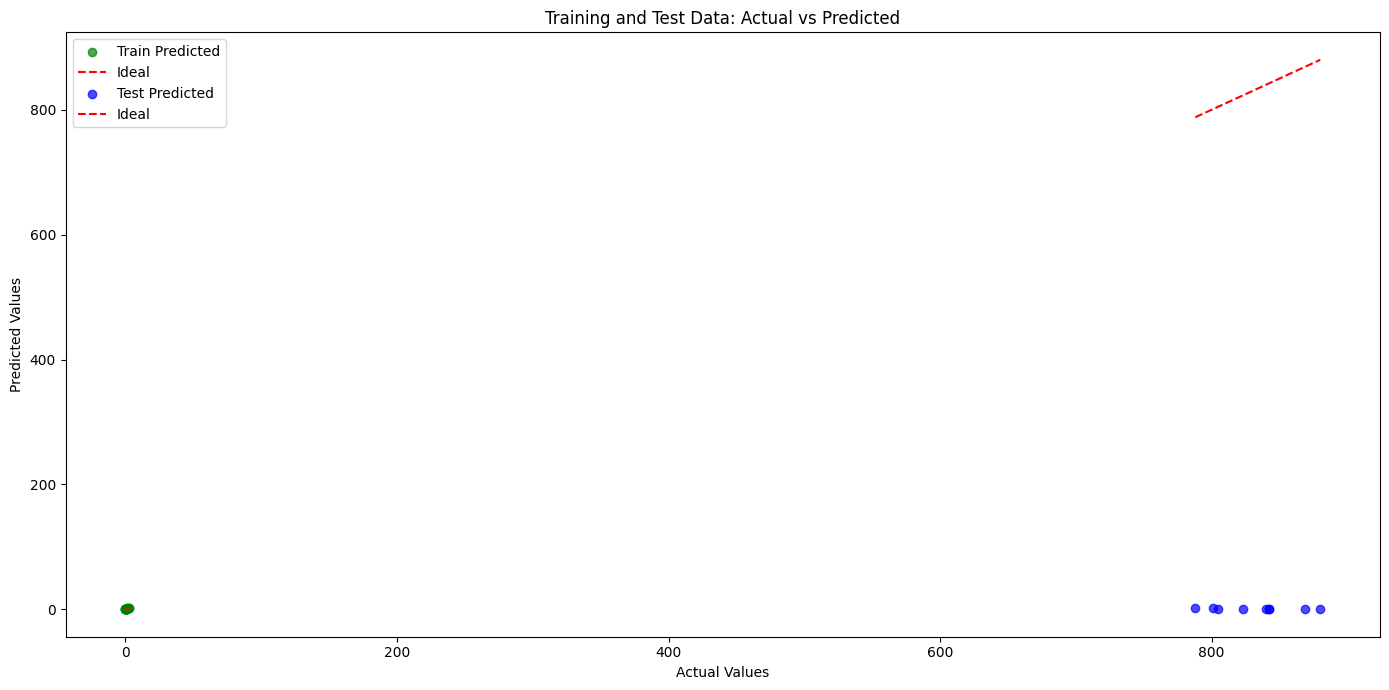

In [11]:
# === Plotting the Results ===
plt.figure(figsize=(14, 7))

# Training Plot: x-axis = Actual (y_train), y-axis = Predicted (y_pred_train)
plt.subplot(1, 1, 1)
plt.scatter(y_train, y_pred_train, color='green', alpha=0.7, label='Train Predicted')
# Plot the perfect prediction line for reference
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Ideal')
plt.title('Training and Test Data: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Test Plot: x-axis = Actual (y_test), y-axis = Predicted (y_pred_test)
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.7, label='Test Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.legend()

plt.tight_layout()
plt.show()